## Project Goals

We were given a data from a fictional insurance company consisting the personal details of their customers and we are tasked to:
1. Investigate the contents of our data set.
2. Check for correlations between variables and how they affect customer charge.
3. Formulate an automated calculation for the estimated customer charge
4. Provide an insight or recommendations regarding the trends and businesss intelligence.

More often than not, insurance agents ask their prospected customers with personal details like age, employed or not, having kids and more importantly, if the customer currently have vices. The aforementioned variables determine the cost of charge for insurance and an automated calculation would be very beneficial to the agency. 

In this project, we will be using graphs and regression models to determine correlation and predictive analysis for our estimation.

### Part 1 - Investigating our data.

We are given a csv file for the data. We will import this to our project using pandas.

Pandas is a good library for data handling since some of the function are easily applied.

In [2]:
#Reading the csv file and checking the contents
import pandas as pd

df_insurance = pd.read_csv('G:\TECHNICAL\Python\Python Projects\Insurance\python-portfolio-project-starter-files\insurance.csv')
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Based on the data provided, there are 6 categories that are probably a variable in calculating the charges. Three of these categories are still in a string format which are unusable in terms of calculations and plot. So, let's first change these strings into codes which are integer. Also, we will sort these values by age.

In [3]:
#Change the string into integer code
df_insurance['sex'] = df_insurance['sex'].astype('category')
df_insurance['sex'] = df_insurance['sex'].cat.codes
df_insurance['smoker'] = df_insurance['smoker'].astype('category')
df_insurance['smoker'] = df_insurance['smoker'].cat.codes
df_insurance['region'] = df_insurance['region'].astype('category')
df_insurance['region'] = df_insurance['region'].cat.codes

#sort our data into age ascending manner
df_insurance_sorted = df_insurance.sort_values('age', ascending = True)

In [4]:
df_insurance_sorted

,age,sex,bmi,children,smoker,region,charges
1248,18,0,39.820,0,0,2,1633.96180
482,18,0,31.350,0,0,2,1622.18850
492,18,0,25.080,0,0,0,2196.47320
525,18,0,33.880,0,0,2,11482.63485
529,18,1,25.460,0,0,0,1708.00140
...,...,...,...,...,...,...,...
398,64,1,25.600,2,0,3,14988.43200
335,64,1,34.500,0,0,3,13822.80300
378,64,0,30.115,3,0,1,16455.70785
1265,64,1,23.760,0,1,2,26926.51440


In [5]:
#Checking if there are nulls within our data
df_insurance_sorted.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

The sum of nulls in our data in each category is 0 which means there values in every row of our dataframe.

Now let's categorize our subjects by age and gender to check for bias, whether the insurance company takes only male or vice versa and the age brack from each individual.

For this part, we will use a conventional python coding by creating three different lists, iterating through the values in each row and applying conditions that will provide a new category in our data set.

In [6]:
#Creating our list from the data set
col_age = list(df_insurance_sorted.age)
col_sex = list(df_insurance_sorted.sex)
col_agender = list(zip(col_age, col_sex))

In [7]:
#Defining our function that will categorize the individuals by age and gender
def count_per_gender_age(col_agender):
    below_20_male = 0
    below_20_female = 0
    around_25_male = 0
    around_25_female = 0
    around_35_male = 0
    around_35_female = 0
    around_45_male = 0
    around_45_female = 0
    around_55_male = 0
    around_55_female = 0
    above_60_male = 0
    above_60_female = 0
    for item in col_agender:
        if item[0] < 20:
            if item[1] == 0:
                below_20_male += 1
            else:
                below_20_female += 1
        elif item[0] >= 20 and item[0] < 30:
            if item[1] == 0:
                around_25_male += 1
            else:
                around_25_female += 1
        elif item[0] >= 30 and item[0] < 40:
            if item[1] == 0:
                around_35_male += 1
            else:
                around_35_female += 1   
        elif item[0] >= 40 and item[0] < 50:
            if item[1] == 0:
                around_45_male += 1
            else:
                around_45_female += 1
        elif item[0] <= 50 and item[0] < 60:
            if item[1] == 0:
                around_55_male += 1
            else:
                around_55_female += 1
        elif item[0] > 60:
            if item[1] == 0:
                above_60_male += 1
            else:
                above_60_female += 1
    return below_20_male, below_20_female, around_25_male, around_25_female, around_35_male, around_35_female, around_45_male, around_45_female, around_55_male, around_55_female, above_60_male, above_60_female

below_20_male, below_20_female, around_25_male, around_25_female, around_35_male, around_35_female, around_45_male, around_45_female, around_55_male, around_55_female, above_60_male, above_60_female = count_per_gender_age(col_agender)

print(below_20_male, below_20_female, around_25_male, around_25_female, around_35_male, around_35_female, around_45_male, around_45_female, around_55_male, around_55_female, above_60_male, above_60_female)

66 71 135 145 127 130 139 140 14 15 47 44


We sorted the age and gender and come up with the values above.

But in order to properly understand them and interpret in where we can use these numbers, we will be visualizing them using MatplotLib with some help of Numpy for arrays. These two libraries are a great pair in visualization and python calculation functions.

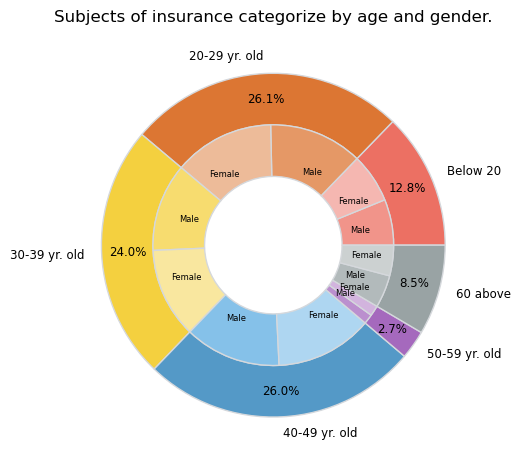

In [8]:
#plotting the values as age and gender
import matplotlib.pyplot as plt
import numpy as np

size = 0.3
labels = ['Below 20', '20-29 yr. old', '30-39 yr. old', '40-49 yr. old', '50-59 yr. old', '60 above']
inner_label = ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female']
vals = np.array([[below_20_male, below_20_female], [around_25_male, around_25_female], [around_35_male, around_35_female], 
                 [around_45_male, around_45_female], [around_55_male, around_55_female], [above_60_male, above_60_female]])

outer_colors = ['#EC7063', '#DC7633', '#F4D03F', '#5499C7', '#A569BD', '#99A3A4']
inner_colors = ['#F1948A', '#F5B7B1', '#E59866', '#EDBB99', '#F7DC6F', '#F9E79F', 
                '#85C1E9', '#AED6F1', '#BB8FCE', '#D2B4DE', '#B2BABB', '#CCD1D1' ]

plt.pie(vals.sum(axis=1), labels = labels, labeldistance= 1.1, radius=1, colors=outer_colors,
        wedgeprops=dict(width=size, edgecolor='#D5D8DC'), textprops={'fontsize':8.5}, autopct='%1.1f%%', pctdistance=.85)

plt.pie(vals.flatten(), radius=1-size, colors=inner_colors, labels = inner_label, labeldistance=.65, 
        wedgeprops=dict(width=size, edgecolor='#D5D8DC'), textprops={'fontsize':6})

plt.title('Subjects of insurance categorize by age and gender.')
plt.tight_layout()
plt.show()

Visualizing the acquired values using a nested pie chart allowed us to view the whole population of our dataframe and also enabled us to inspect the fractions.

As we can observe, majority of our insurance customers are within the age bracket of below 50 and above 20 years old. If we were to interpret this, the individuals who would likely to avail our insurance are those who are in the years of employment which also relatively indicated by age.

The chart also partitioned the age bracket by gender which displays a fair amount of ratio between male and female. This checks our data selection bias as we have almost identical amount between genders and not favoring one over the other. 

Now that we talked about the bias, we will also do the same with to our regions data.

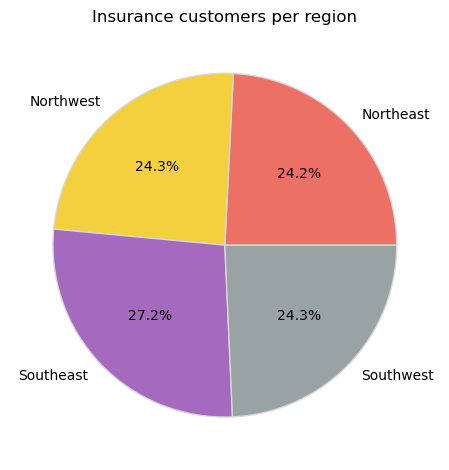

In [9]:
#Defining our function that will count the number of customers per region
col_region = df_insurance_sorted['region']

def count_region(col_region):
    northeast = 0
    northwest = 0
    southeast = 0
    southwest = 0
    for regions in col_region:
        if regions == 0:
            northeast += 1
        elif regions == 1:
            northwest += 1
        elif regions == 2:
            southeast += 1
        else:
            southwest += 1
    return northeast, northwest, southeast, southwest

northeast, northwest, southeast, southwest = count_region(col_region)

#Plotting our values
size = 0.3
labels = ['Northeast', 'Northwest', 'Southeast', 'Southwest']
vals = np.array([[northeast, northwest], [southeast, southwest]])
outer_colors = ['#EC7063', '#F4D03F', '#A569BD', '#99A3A4']

plt.pie(vals.flatten(), labels=labels, autopct='%1.1f%%', 
        wedgeprops=dict(edgecolor='#D5D8DC'), textprops={'fontsize':10}, colors=outer_colors)
plt.title('Insurance customers per region')
plt.tight_layout()
plt.show()

With the percentage result seen from our pie chart, we can tell that our data set is also negative in selection bias in terms of the location of the customers as the values are well distributed in the chart.

### Part 2 - Variable Correlations

Our data set consists of six categories that could relate to calculating the insurance charge and we already checked our customers based on age, gender and location. Now, we have two more categories that we haven't touched yet, BMI and being a smoker.

For those who are not familiar with BMI or Body Mass Index, it is a measure of a person's mass and height. These variables are not a part of our data frame. But with curiosity, let us check whether the gender, age and being a smoker can be translated to our BMI value.

We will be using a scatter plot visualization to check for correlations between these variables. A basic scatter plot uses a coordinate system , x and y, to create a graphical representation. In order for us to integrate two more variables we will need to transform some of our variables into a new code system.

To start with our scatter plot representation and better comprehension, let us use this assignment to our variables:
 - x_axis = Age
 - y_axis = BMI
 - Markers = Gender/Smoker
      - 1: Male/Non-smoker
      - 2: Male/Smoker
      - 3: Female/Non-Smoker
      - 4: Female/Smoker
 
 We will be using these conventions as our legend in our scatter plot.

In [10]:
#Categorizing the population by pairing gender and smoker:
col_sex = list(df_insurance.sex)
col_smoker = list(df_insurance.smoker)
list_smoker_gender = list(zip(col_sex, col_smoker))

In [16]:
#Defining our function to sort the gender and smoker
def det_gender_smoker(list_smoker_gender):
    cat_smoker_gender = []
    for pair in list_smoker_gender:
        if pair[0] == 0:
            if pair[1] == 0:
                cat_smoker_gender.append(1)
            else:
                cat_smoker_gender.append(2)
        else:
            if pair[1] == 0:
                cat_smoker_gender.append(3)
            else:
                cat_smoker_gender.append(4)
    return cat_smoker_gender

cat_smoker_gender = det_gender_smoker(list_smoker_gender)

Now with all the variables covered, we will be plotting these into our scatter plot.

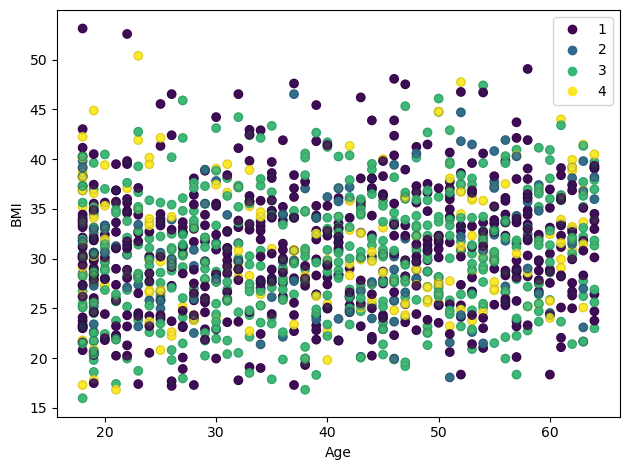

In [18]:
scatter = plt.scatter(df_insurance_sorted.age, df_insurance_sorted.bmi, c=cat_smoker_gender)
plt.legend(*scatter.legend_elements())
plt.scatter(df_insurance_sorted.age, df_insurance_sorted.bmi, c=cat_smoker_gender, cmap='summer', 
            edgecolor='black', linewidth=1, alpha=0.1)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.plot()
plt.tight_layout()
plt.show()

As visualised by the scatter plot, there are several things we can deduce here.
 1. The markers in age and BMI plot are scattered. We have an age 20 with different levels of BMI which can also be observed in the age of 50 and 60.
 2. Individuals who smoke and those who don't are also scattered in our plot for both genders
 3. Thus, we can say that these four variables does not have correlations with each other or simply it could be just an individual's way of living.

As this point, we already have checked the correlations between variables, fractioned our customers and their location in percentage of the population.

All we have left is to correlate our variables to insurance charge. Separately, I tried to plot every category versus the insurance charge but all correlations lead us to linear regression, which will be discussed on the next part, or no correlation due to coded values except for one variable, the smoker column. 

The scatter plot representation of smoker category versus charges can provide us a very insightful analysis when it comes to prediction. Let us plot the values first to better understand the relation.

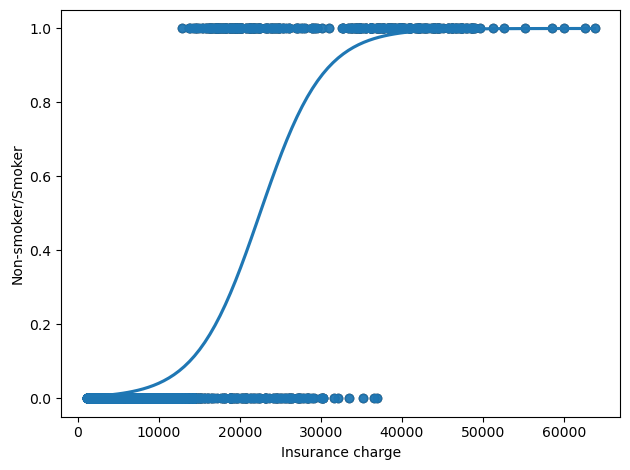

In [21]:
#Using seaborn library to create our regression curve
import seaborn as sns

#Plotting our smoker column versus the charges
plt.scatter(df_insurance_sorted['charges'], df_insurance_sorted['smoker'], edgecolor='black', linewidth=1, alpha=0.75)
plt.xlabel('Insurance charge')
plt.ylabel('Non-smoker/Smoker')
x = df_insurance_sorted['charges'].values
y = df_insurance_sorted['smoker'].values
sns.regplot(x=x, y=y, data=df_insurance_sorted, logistic=True, ci=None)
plt.tight_layout()
plt.show()

The graph shows that the highest insurance charge for non-smokers will be approximately around 37,000 and for smokers can reach beyond 60,000. Conversely, we also have minimum possible insurance charge for both classification. Let us further explore about this to see how can we take advantage of this as a customer or an insurance agency. 

Notice that the graph above does not only presents the values but also shows a curve line. This curve line is called a 'sigmoid curve' or a 'sigmoid function'. This curve exhibits a logistic regression in our scatter plot, although our values in the data does not necessarily presents a monotonically increasing function, it can definitely show us that insurance charge is differentiable.

With that in mind, we can use logistic regression in our values to determine the probabilities in in our values.

Mathematically, we will be applying the equation 1/(1+e^-x) logit function into this study.

In [22]:
#We will be using numpy for arrays and sci-kit learn libraries in our code.
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [26]:
#Dropping the unwanted columns in our data set.
log_data = df_insurance_sorted.drop(columns = ['bmi', 'age', 'region', 'children', 'sex'])
log_data['smoker'] = log_data['smoker'].astype('category')
log_data['smoker'] = log_data['smoker'].cat.codes

#Setting the variables x and y into a multidimensional array using numpy.
x1 = np.array(log_data.charges.values).reshape(-1,1)
y1 = np.array(log_data.smoker.values)

#Splitting our samples for testing and training.
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=.1)    

In [27]:
#Setting our model into logistic regression and fitting our training samples.
model1 = LogisticRegression()
model1.fit(x1_train, y1_train)

LogisticRegression()

After setting up our logistic regression model, we can now predict or differentiate an individual based on the insurance charge if he/she is a smoker.

Recall that previously, we categorized the smoker column into:
    0 - as a Non-smoker
    1 - as a Smoker
    
Let's try our predictions.

In [28]:
model1.predict(np.array([30000]).reshape(-1,1))

array([1], dtype=int8)

To explain the above prediction, we set our insurance charge as a value to predict and the output shows an array of [1] which means that the customer with 30,000 insurance charge is a smoker.

Another thing to note that differentiating to classifications also exhibits probability. Let us also check this for further knowledge in our insurance agency.

We will try to inspect the probability of different values ranging from 20,000 to 30,000 at an interval of 1,000.

In [29]:
model1.predict_proba(np.array([range(20000,30000,1000)]).reshape(-1,1))

array([[0.65708808, 0.34291192],
       [0.59961742, 0.40038258],
       [0.53926848, 0.46073152],
       [0.47774594, 0.52225406],
       [0.41689125, 0.58310875],
       [0.35846758, 0.64153242],
       [0.30396346, 0.69603654],
       [0.25445948, 0.74554052],
       [0.21057864, 0.78942136],
       [0.17251394, 0.82748606]])

The output presents these probabilities:
20,000 -> [0.65708808, 0.34291192]
21,000 -> [0.59961742, 0.40038258]
22,000 -> [0.53926848, 0.46073152]
23,000 -> [0.47774594, 0.52225406]
24,000 -> [0.41689125, 0.58310875]
25,000 -> [0.35846758, 0.64153242]
26,000 -> [0.30396346, 0.69603654]
27,000 -> [0.25445948, 0.74554052]
28,000 -> [0.21057864, 0.78942136]
29,000 -> [0.17251394, 0.82748606]

The 1st column represents the probabilities of being a 0 (non-smoker) while the 2nd represents the probabilities of being a 1 (smoker). Notice that the probabilities in the 1st column are decreasing while the other is increasing.

Taking this into account, we can say the following conclusions:
 1. Availing an insurance while being a smoker will cost you a minimum of approximately 23,000.
 2. Availing an insurance with no vice of smoking will only cost you a maximum of approximately 22,000.
 3. As an insurance agency, it will be a great deal to ask an individual for smoking habit as this is a major factor in insurance costing.
 
Note that this is a machine learning way to predict the possible costs of insurance for a customer. This is very beneficial to consider for both customer and insurance agency.

### Part 3 - Multiple Linear Regression

Six variables and one dependent variable. Insurance charge calculations are dependent on the categories in our data so therefore, we need to find how to correlate the values to charges in order to come up with a mathematical formula in predicting the cost.

Linear regression provides a way to come up with an equation by using a set of coordinates in a graph that can represent a linear line which fits the data the best. And in order to formulate the equation, we need to find the numerical coefficient, m (slope) and the constant (y-intercept).

Mathematically, it follows this equation:
    y = m*x + b
    
That's if only one indpendent variable controls a single dependent variables. But how about there's more than one independent variable? This is the time we will resort to multiple linear regression.

Multiple linear regression allows us to correlate two or more independent variable with a single variable and we will be using this regression model for our predictive analysis.

In [32]:
#Saving our categories as x and y variables
xmlr = df_insurance_sorted.drop(columns = 'charges')
ymlr = df_insurance_sorted['charges']

#Splitting our data set into training and testing samples
xmlr_train, xmlr_test, ymlr_train, ymlr_test = train_test_split(xmlr, ymlr, test_size=.3, random_state = 0)

#Setting our model as linear regression and fitting our train set to our model
model = LinearRegression()
model.fit(xmlr_train, ymlr_train)

LinearRegression()

First, lest us check the correlations of our variables to charges.

In [33]:
df_insurance_sorted.corr()['charges']

age         0.299008
sex         0.057292
bmi         0.198341
children    0.067998
smoker      0.787251
region     -0.006208
charges     1.000000
Name: charges, dtype: float64

The numbers above shows how related each variable to charges. Do note that these values cannot be summed due to the fact that they are independent and mutually exclusive with each other.

Continuing with our regression, we can now calculate the coefficients and constant for our predictive model.

In [36]:
c = model.coef_
i = model.intercept_

print('Coefficients:', c, '\nIntercept:', i)

Coefficients: [  250.6631136   -285.77920298   341.5824549    516.62398028
 23617.20872567  -311.78098775] 
Intercept: -11873.930008640504


Acquiring these numbers now enables us to formulate our mathematical syntax, and it will be like this:
    y = 250.66*x1 - 285.779*x2 + 341.582*x3 + 516.624*x4 + 23617.208*x5 - 311.78*x6 - 11873.93
  where:
      x1 = age
      x2 = sex
      x3 = bmi
      x4 = children
      x5 = smoker
      x6 = region

Moving forward, let us try to predict our values in our training set and compare.

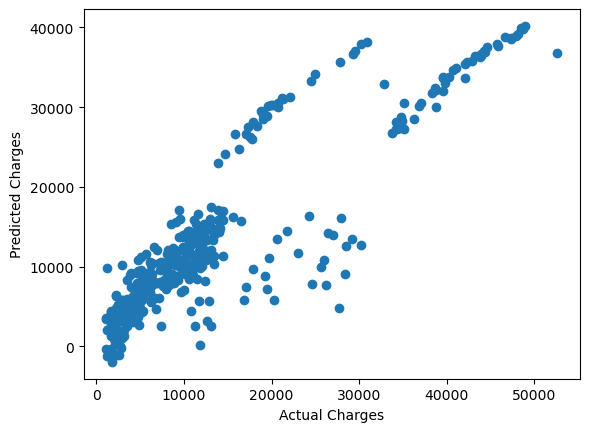

In [40]:
y_pred_test= model.predict(xmlr_test)
plt.scatter(ymlr_test, y_pred_test)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

This plot compares the actual charges in our data versus the predicted values in our testing samples. Majority of our correct predictions falls below the 20,000 margin. To further check, we will be using MSE(mean absolute error) to see how far off our values to the actual.

In [41]:
mean_absolute_error(ymlr_test, y_pred_test)

3881.1548713782786

This number shows the average absolute error we have compared to the values in our data.

Lastly, for our checking, we need to find the R-squared score to determine how good our model in predicting our insurance charge.

R-squared can take any values between 0 to 1 where 0 being the lowest (definitely no correlation) and 1 or -1 that shows a good correlation, positively or negatively. So to speak, if we have 0.45 R-squared value, it would mean that our regression model can represent 45% of the target variable. Let's check.

In [42]:
r2_score(ymlr_test, y_pred_test)

0.7935977413453547

This explains that 79% of our regression model or our mathematical syntax fits our data frame and explain the variations in our variables.

### Findings

1. Majority of our insurance customers are within the age bracket of below 50 and above 20 years old which most likely to be still in employment age.
2. The independent variables are mutually exclusive with each other. There are no correlations between the variables.
3. Availing an insurance while being a smoker will cost you a minimum of approximately 23,000.
4. Availing an insurance with no vice of smoking will only cost you a maximum of approximately 22,000.
5. Our data can be represent by our regression model or manually calculated using the equation:
    y = 250.66*x1 - 285.779*x2 + 341.582*x3 + 516.624*x4 + 23617.208*x5 - 311.78*x6 - 11873.93
6. Finally, our model fits our data set with 79% R-squared score.
